[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/constanzacaride/Emergencias/blob/main/1NIVEL_RIOS.ipynb)

##Nivel de los ríos y alertas por inundación

INPUTS: </br>
1- Rios_base.shp (vector de puntos de los puertos de Argentina) al cual se le agregó una columna en la tabla de atributos que registra a que región pertenece cada punto. Se eligió esta opción, en lugar de hacer un join espacial, ya que hay puertos de países limítofes que son de interés. </br>
2-  URL al Instituto Nacional del Agua - INA y acceso al archivo geojson con la altura actual de los ríos. </br>

OUTPUTS: </br>
1- Shapefile de puntos de los puertos de Argentina con la altura actual de los ríos. </br>
2- Shapefiles de puntos de los puertos para cada región de Argentina con la altura actual de los ríos. </br>

RESUMEN DE PASOS DEL SCRIPT:
- Descarga el archivo Geojson de la página del INA con la altura actual de los ríos.
- Carga el archivo Rios_base.shp.
- Realiza un merge por el campo "unid".
- Guarda un archivo shapefile con la altura actual de los ríos para toda Argentina.
- Guarda un archivo shapefile con la altura actual de los ríos para cada una de las regiones de Argentina.


In [ ]:
#Instalo los paquetes que no están preinstaldos en colab
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 26.8 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,200 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugi

In [ ]:
#importo las librerías
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import requests as rq
import os
import time
from datetime import datetime, timedelta
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd

In [ ]:
#Hago la conexión al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Defino la ruta (desde My Drive...) a la carpeta en la que se van a guardar los archivos de salida (la carpeta ya debe existir)
path_salidas = "/content/drive/MyDrive/" + input("/content/drive/MyDrive/ -> Escriba la carpeta o el path en el que va a trabajar: ")
print(path_salidas)

/content/drive/MyDrive/ -> Escriba la carpeta o el path en el que va a trabajar: Salidas
/content/drive/MyDrive/Salidas


In [ ]:
#Fecha actual
hoy = datetime.today().strftime('%Y-%m-%d')
print(hoy)

2025-01-14


In [ ]:
#Creo una carpeta salidas
os.mkdir(path_salidas + '/Rios'+ hoy)
path_rios = (path_salidas + '/Rios'+ hoy)
print(path_rios)

/content/drive/MyDrive/Salidas/Rios2025-01-14


In [ ]:
#Creo un archivo que registre la fecha y hora de procesamiento
fh = datetime.today() - timedelta(hours=3, minutes=0)
text_file = open(path_rios + '/0_Fecha-hora_procesamiento.txt', 'w')
my_string = str(fh)
text_file.write(my_string)
text_file.close()
print(fh)

2025-01-14 11:43:37.049449


In [ ]:
#Abro el Google Chrome
service = Service()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("window-size=1200x600")
chrome_prefs = {"download.default_directory" : "/content/" }
chrome_options.add_experimental_option("prefs", chrome_prefs)

driver = webdriver.Chrome(service=service, options=chrome_options)

In [ ]:
#Abro el sitio del INA
driver.get("https://alerta.ina.gob.ar/pub/mapa")

In [ ]:
#Presiono el botón que descarga el archivo geoJSON
button = driver.find_element(By.XPATH, '/html/body/div[2]/div/div[1]/div[3]/a[1]')
print("Element is visible? " + str(button.is_displayed()))
button.click()
print("Data saved")

Element is visible? True
Data saved


In [ ]:
#Doy tiempo a que descargue y salgo del sitio
time.sleep(5)
driver.quit()

In [ ]:
#Veo la información descargada
estado_rios = gpd.read_file('/content/ultimas_alturas_con_timeseries.json')
print(type(estado_rios))
estado_rios

<class 'geopandas.geodataframe.GeoDataFrame'>


,id,unid,fecha,valor,valor_precedente,tendencia,estado,est,condicion,nombre,...,cero_ign,series_id,var_id,timeseries,nivel_de_alerta,nivel_de_evacuacion,nivel_de_aguas_bajas,timestart,timeend,geometry
0,ultimas_alturas_con_timeseries.fid--53e20332_1...,105,2025-01-13 10:11:00+00:00,2.90,3.00,baja,normal,n,baja:n,Tostado,...,65.98,105,2,"[[""2025-01-07T14:58:00.000Z"",""3.10""],[""2025-01...",4.0,0.0,0.0,2025-01-07 14:58:00+00:00,2025-01-13 10:11:00+00:00,POINT (-61.74394 -29.27517)
1,ultimas_alturas_con_timeseries.fid--53e20332_1...,174,2025-01-13 10:11:00+00:00,3.06,3.07,baja,normal,n,baja:n,San Justo - Ruta Provincial nº 2,...,26.85,174,2,"[[""2025-01-07T14:58:00.000Z"",""3.10""],[""2025-01...",9.0,0.0,0.0,2025-01-07 14:58:00+00:00,2025-01-13 10:11:00+00:00,POINT (-60.62425 -30.74403)
2,ultimas_alturas_con_timeseries.fid--53e20332_1...,1679,2025-01-13 10:13:00+00:00,1.82,2.11,baja,normal,n,baja:n,Santo Tomé,...,NaN,3044,2,"[[""2025-01-07T14:59:00.000Z"",""2.67""],[""2025-01...",4.7,0.0,0.0,2025-01-07 14:59:00+00:00,2025-01-13 10:13:00+00:00,POINT (-60.75223 -31.6676)
3,ultimas_alturas_con_timeseries.fid--53e20332_1...,1680,2025-01-13 10:13:00+00:00,0.18,NaN,baja,normal,n,baja:n,Cululú - RP50-s,...,NaN,3045,2,"[[""2025-01-07T14:59:00.000Z"",""0.18""],[""2025-01...",4.0,0.0,0.0,2025-01-07 14:59:00+00:00,2025-01-13 10:13:00+00:00,POINT (-60.88776 -31.25453)
4,ultimas_alturas_con_timeseries.fid--53e20332_1...,176,2025-01-14 12:00:00+00:00,264.29,264.47,baja,,x,baja:x,Chapeco_efluente,...,NaN,176,2,"[[""2025-01-07T03:00:00.000Z"",""264.30""],[""2025-...",0.0,0.0,0.0,2025-01-07 03:00:00+00:00,2025-01-14 12:00:00+00:00,POINT (-53.0435 -27.14007)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,ultimas_alturas_con_timeseries.fid--53e20332_1...,6745,2025-01-14 14:00:00+00:00,-0.13,-0.13,permanece,,x,permanece:x,Guanasacate - Jesús Maria,...,NaN,33948,2,"[[""2025-01-07T03:00:00.000Z"",""-0.13""],[""2025-0...",0.0,0.0,0.0,2025-01-07 03:00:00+00:00,2025-01-14 14:00:00+00:00,POINT (-64.09111 -30.97028)
382,ultimas_alturas_con_timeseries.fid--53e20332_1...,6746,2025-01-14 13:00:00+00:00,0.27,0.27,permanece,,x,permanece:x,Canal San Antonio- RP Nº66,...,NaN,34178,2,"[[""2025-01-07T03:00:00.000Z"",""0.33""],[""2025-01...",0.0,0.0,0.0,2025-01-07 03:00:00+00:00,2025-01-14 13:00:00+00:00,POINT (-62.16889 -31.99056)
383,ultimas_alturas_con_timeseries.fid--53e20332_1...,6747,2025-01-14 14:00:00+00:00,1.08,1.52,baja,,x,baja:x,Areco - San Antonio de Areco,...,NaN,34224,2,"[[""2025-01-07T03:00:00.000Z"",""1.48""],[""2025-01...",0.0,0.0,0.0,2025-01-07 03:00:00+00:00,2025-01-14 14:00:00+00:00,POINT (-59.49944 -34.24056)
384,ultimas_alturas_con_timeseries.fid--53e20332_1...,6748,2025-01-14 13:00:00+00:00,2.49,2.49,permanece,,x,permanece:x,Lag. La Picasa - Escollera FFC,...,NaN,34314,2,"[[""2025-01-07T03:00:00.000Z"",""2.49""],[""2025-01...",0.0,0.0,0.0,2025-01-07 03:00:00+00:00,2025-01-14 13:00:00+00:00,POINT (-62.32472 -34.33722)


In [ ]:
#Veo los nombres de las columnas
estado_rios.columns

Index(['id', 'unid', 'fecha', 'valor', 'valor_precedente', 'tendencia',
       'estado', 'est', 'condicion', 'nombre', 'tabla', 'cero_ign',
       'series_id', 'var_id', 'timeseries', 'nivel_de_alerta',
       'nivel_de_evacuacion', 'nivel_de_aguas_bajas', 'timestart', 'timeend',
       'geometry'],
      dtype='object')

In [ ]:
#Selecciono las columnas que me interesan (veo de que tipo son)
rios_filt = estado_rios[['unid','nombre','fecha', 'valor', 'valor_precedente', 'tendencia', 'nivel_de_aguas_bajas', 'estado', 'nivel_de_alerta', 'nivel_de_evacuacion', 'condicion', 'geometry']]
print(rios_filt.dtypes)
rios_filt

unid                                  int32
nombre                               object
fecha                   datetime64[ms, UTC]
valor                               float64
valor_precedente                    float64
tendencia                            object
nivel_de_aguas_bajas                float64
estado                               object
nivel_de_alerta                     float64
nivel_de_evacuacion                 float64
condicion                            object
geometry                           geometry
dtype: object


,unid,nombre,fecha,valor,valor_precedente,tendencia,nivel_de_aguas_bajas,estado,nivel_de_alerta,nivel_de_evacuacion,condicion,geometry
0,105,Tostado,2025-01-13 10:11:00+00:00,2.90,3.00,baja,0.0,normal,4.0,0.0,baja:n,POINT (-61.74394 -29.27517)
1,174,San Justo - Ruta Provincial nº 2,2025-01-13 10:11:00+00:00,3.06,3.07,baja,0.0,normal,9.0,0.0,baja:n,POINT (-60.62425 -30.74403)
2,1679,Santo Tomé,2025-01-13 10:13:00+00:00,1.82,2.11,baja,0.0,normal,4.7,0.0,baja:n,POINT (-60.75223 -31.6676)
3,1680,Cululú - RP50-s,2025-01-13 10:13:00+00:00,0.18,NaN,baja,0.0,normal,4.0,0.0,baja:n,POINT (-60.88776 -31.25453)
4,176,Chapeco_efluente,2025-01-14 12:00:00+00:00,264.29,264.47,baja,0.0,,0.0,0.0,baja:x,POINT (-53.0435 -27.14007)
...,...,...,...,...,...,...,...,...,...,...,...,...
381,6745,Guanasacate - Jesús Maria,2025-01-14 14:00:00+00:00,-0.13,-0.13,permanece,0.0,,0.0,0.0,permanece:x,POINT (-64.09111 -30.97028)
382,6746,Canal San Antonio- RP Nº66,2025-01-14 13:00:00+00:00,0.27,0.27,permanece,0.0,,0.0,0.0,permanece:x,POINT (-62.16889 -31.99056)
383,6747,Areco - San Antonio de Areco,2025-01-14 14:00:00+00:00,1.08,1.52,baja,0.0,,0.0,0.0,baja:x,POINT (-59.49944 -34.24056)
384,6748,Lag. La Picasa - Escollera FFC,2025-01-14 13:00:00+00:00,2.49,2.49,permanece,0.0,,0.0,0.0,permanece:x,POINT (-62.32472 -34.33722)


In [ ]:
#Cambio el formato de la columna fecha a texto y le saco hh:mm:ss para que me los acepte el shapefile
rios_filt['fecha'] = rios_filt['fecha'].dt.strftime("%Y-%m-%d")
rios_filt

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,unid,nombre,fecha,valor,valor_precedente,tendencia,nivel_de_aguas_bajas,estado,nivel_de_alerta,nivel_de_evacuacion,condicion,geometry
0,105,Tostado,2025-01-13,2.90,3.00,baja,0.0,normal,4.0,0.0,baja:n,POINT (-61.74394 -29.27517)
1,174,San Justo - Ruta Provincial nº 2,2025-01-13,3.06,3.07,baja,0.0,normal,9.0,0.0,baja:n,POINT (-60.62425 -30.74403)
2,1679,Santo Tomé,2025-01-13,1.82,2.11,baja,0.0,normal,4.7,0.0,baja:n,POINT (-60.75223 -31.6676)
3,1680,Cululú - RP50-s,2025-01-13,0.18,NaN,baja,0.0,normal,4.0,0.0,baja:n,POINT (-60.88776 -31.25453)
4,176,Chapeco_efluente,2025-01-14,264.29,264.47,baja,0.0,,0.0,0.0,baja:x,POINT (-53.0435 -27.14007)
...,...,...,...,...,...,...,...,...,...,...,...,...
381,6745,Guanasacate - Jesús Maria,2025-01-14,-0.13,-0.13,permanece,0.0,,0.0,0.0,permanece:x,POINT (-64.09111 -30.97028)
382,6746,Canal San Antonio- RP Nº66,2025-01-14,0.27,0.27,permanece,0.0,,0.0,0.0,permanece:x,POINT (-62.16889 -31.99056)
383,6747,Areco - San Antonio de Areco,2025-01-14,1.08,1.52,baja,0.0,,0.0,0.0,baja:x,POINT (-59.49944 -34.24056)
384,6748,Lag. La Picasa - Escollera FFC,2025-01-14,2.49,2.49,permanece,0.0,,0.0,0.0,permanece:x,POINT (-62.32472 -34.33722)


In [ ]:
#Reemplazo las columnas que tienen nombres largos (ya que voy a guardar la info en formato shapefile y no pueden tener más de 8 caracteres)
rios_filt_rn = rios_filt.rename(columns={'valor': 'valor_ac', 'valor_precedente': 'valor_pr', 'tendencia': 'tendenc', 'nivel_de_aguas_bajas':'n_ag_baj', 'nivel_de_alerta': 'n_alerta', 'nivel_de_evacuacion': 'n_evac', 'condicion': 'condic'})
rios_filt_rn.columns

Index(['unid', 'nombre', 'fecha', 'valor_ac', 'valor_pr', 'tendenc',
       'n_ag_baj', 'estado', 'n_alerta', 'n_evac', 'condic', 'geometry'],
      dtype='object')

In [ ]:
#Puedo traer archivos que tenga en algún repositorio de github (para subirlos al git deben ser más chicos de 25M)
#Buscar la dirección .git del repositorio (ver imágen debajo)
#Una vez corrida la sentencia el repositorio se clona en la carpeta contenidos (ver la tabla de contenidos a la izquierda)
!git clone "https://github.com/constanzacaride/Emergencias.git"

Cloning into 'Emergencias'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 47 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 18.06 MiB | 15.52 MiB/s, done.
Resolving deltas: 100% (9/9), done.


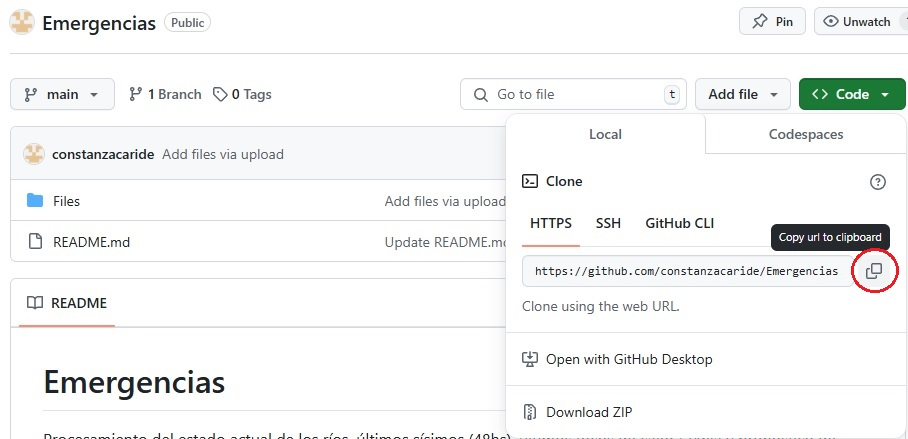

In [ ]:
#Descomprimo el archivo zip
currentFileZip= ZipFile("/content/Emergencias/Files/Rios_base.zip") #El archivo está en formato .shp
currentFileZip.extractall("/content/")
currentFileZip.close()
print("Archivo deszipeado")

Archivo deszipeado


In [ ]:
#Abro el shapefile Rios_base
base = gpd.read_file("/content/Rios_base.shp")
base

,OBJECTID,nombre,unid,Rio,Region,geometry
0,1,Los Sosa en RP30 km19,2166,None,Noroeste,POINT Z (-7306578.466 -3136075.199 0)
1,2,Canal MACAPILLO \t,2175,None,Noroeste,POINT Z (-7121788.112 -2926633.572 0)
2,3,Canal Liag - Quebrachal,2177,None,Noroeste,POINT Z (-7129456.788 -2918214.176 0)
3,4,AbaucÃ¡n en Tinogasta,2196,None,Noroeste,POINT Z (-7528197.019 -3248098.283 0)
4,5,RÃ­o Arenales - La Maroma,2593,None,Noroeste,POINT Z (-7282521.088 -2894658.276 0)
...,...,...,...,...,...,...
337,338,Puerto IguazÃº,9,PARANA,Litoral,POINT Z (-6074585.966 -2949105.128 0)
338,339,El Dorado,11,PARANA,Litoral,POINT Z (-6088418.893 -3046777.289 0)
339,340,Piray GuazÃº - R. Nac. 12 Vieja,6435,None,Litoral,POINT Z (-6076745.47 -3059378.977 0)
340,341,Salto Grande Arriba,77,None,Litoral,POINT Z (-6449809.206 -3668382.382 0)


In [ ]:
#Me quedo solo con la coumnas "unid" "Rio" y "Region" (para que no me queden duplicada las otras columnas)
base_s = base[['unid', 'Region', 'Rio']]
base_s

,unid,Region,Rio
0,2166,Noroeste,None
1,2175,Noroeste,None
2,2177,Noroeste,None
3,2196,Noroeste,None
4,2593,Noroeste,None
...,...,...,...
337,9,Litoral,PARANA
338,11,Litoral,PARANA
339,6435,Litoral,None
340,77,Litoral,None


In [ ]:
#Hago un merge de las regiones al gdf por la columna unid
base_m = rios_filt_rn.merge(base_s, on = 'unid')
base_m

,unid,nombre,fecha,valor_ac,valor_pr,tendenc,n_ag_baj,estado,n_alerta,n_evac,condic,geometry,Region,Rio
0,105,Tostado,2025-01-13,2.90,3.00,baja,0.00,normal,4.0,0.0,baja:n,POINT (-61.74394 -29.27517),Litoral,None
1,174,San Justo - Ruta Provincial nº 2,2025-01-13,3.06,3.07,baja,0.00,normal,9.0,0.0,baja:n,POINT (-60.62425 -30.74403),Litoral,None
2,1679,Santo Tomé,2025-01-13,1.82,2.11,baja,0.00,normal,4.7,0.0,baja:n,POINT (-60.75223 -31.6676),Litoral,None
3,1680,Cululú - RP50-s,2025-01-13,0.18,NaN,baja,0.00,normal,4.0,0.0,baja:n,POINT (-60.88776 -31.25453),Litoral,None
4,164,Villeta,2025-01-14,0.13,0.15,baja,1.25,aguas bajas,5.5,7.5,baja:b,POINT (-57.57091 -25.51314),Litoral,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,6660,Pilcomayo - Villa Gral. Güemes,2025-01-14,1.04,1.05,baja,0.00,,0.0,0.0,baja:x,POINT (-59.49972 -24.74694),Litoral,None
273,6664,Aº Mocoretá - RN Nº 14,2025-01-14,1.73,1.77,baja,0.00,,0.0,0.0,baja:x,POINT (-57.98278 -30.6275),Litoral,None
274,6665,San Antonio - San Antonio,2025-01-13,0.10,0.10,permanece,0.00,,0.0,0.0,permanece:x,POINT (-53.73111 -26.05667),Litoral,None
275,6698,Salado RP Nº 51 - Achupallas,2025-01-14,-2.00,-2.00,permanece,0.00,,0.0,0.0,permanece:x,POINT (-60.10889 -35.08806),Centro,None


In [ ]:
#Guardo el join en un archivo shapfile
base_m.to_file(filename= path_rios + '/Rios_Arg.shp')

In [ ]:
#Genero una lista con los nombres de las regiones
regiones = base_m['Region'].unique()
regiones = list(regiones)
print(type(regiones))
regiones

<class 'list'>


['Litoral', 'Centro', 'Patagonia', 'Cuyo', 'Noroeste']

In [ ]:
#Guardo los puntos de cada región en un shape independiente
for i in regiones:
  base_m[base_m['Region']==i].to_file(filename= path_rios + "/Rios_" + i + ".shp")

In [ ]:
#Veo si hay alertas (de inundación)
alerta= base_m['estado'].unique()
alerta = list(alerta)
print(alerta)
if ('evacuación' or 'alerta') in alerta: #no está reconociendo la tercera opción
  print('Hay alertas')

  #Hago una tabla que tenga solo los que están en Alerta, Evacuación o Aguas bajas
  writer = pd.ExcelWriter(path_rios + "/1_AlertasxReg.xlsx")

  for i in regiones:
    tab_filt = base_m[base_m.Region.eq(i) & base_m.estado.isin(['evacuación', 'alerta'])]
    selec = tab_filt.loc[:, ['nombre', 'estado', 'valor_ac', 'n_alerta', 'n_evac', 'tendenc', 'Region', 'Rio']]
    if selec.empty == False:
      selec.to_excel(writer, sheet_name= i, index=False)

  writer.close()

else:
  print('NO hay alertas de inundación')

['normal', 'aguas bajas', '']
NO hay alertas de inundación
